# Feature Engineering - Filling or Dropping Data based on Columns 

În urma tutorialului precedent acum trebuie să ne ocupă de datele lipsă care trec de procentajul de 1%. Pentru aceste date nu mai putem să ștergem rândurile unde avem anumite features lipsă, din acest moment trebuie să luăm în calcul partea de column feature unde trebuie să decidem pentru îbntreaga coloană. Fie înlocuim acele date lipsă cu o anumită valoare, fie ștergem tot feature-ul (ștergem toată coloana). Atunci când facem drop la un feature întreg, este extrem de simplu, de rapid și de ușor, iar un alt avantaj este faaptul că nu trebuie să ne mai facem griji pentru acel feature pe viitor dacă o să mai avem date lipsă deoarece aceste feature o să fie șters. Din moment ce ne gândim să ștergem un feature cu totul trebuie să ne uităm înainte la acest feature pentru a vedea dacă are o importanță mare pentru modelul respectiv, dacă are o corelație mare. Trebuie să luăm în considerare partea de ștergere de feature doar atunci când are un procent ridicat de valori NaN

În situația în care alegem să înlocuim datele lipsă din cadrul unui feature, aici de asemenea există anumite avantaje și dezavantaje. Atunci când modificăm aceste valori este foarte probabil să modificăm ceea ce este real, ceea ce am primit în date posibil să fi fost corect, să lipsească acea valoare (acel feature) de la un anumit element, iar în momentul în care am decis să înlocuim valorile nule atunci schimbăm datele primite.

Atunci când alegem să înlocuim datele pentru un feature care are un procentaj mare de date lipsă, atunci este foarte probabil ca și când primim date noi pe baza cărora trebuie să facem predicții să avem date lipsă în acele features. Pentru asta trebuie să fim pregătiți și să nu salvăm doar modelul final, trebuie să salvăm și anumite metode speciale care o să se ocupe de partea asta de transformare de date.

Cea mai simplă metodă de a înlocui date este de a le înlocui cu o asumpție rezonabilă. De exemplu, dacă avem un feature care reprezintă metri pătrați de garaj de la casă și sunt valori cu NaN, acele valori de cele mai multe ori înseamnă că nu există garaj, iar atunci se poate înlocui cu valoare 0 ceea ce este prezent cu NaN. Partea mai grea este atunci când trebuie să utilizăma numite metode statistice pentru a înlocui acele valori lipsă. Un astfel de exemplu poate fi pentru un set de date în care se adună informații referitoare la vârsta persoanelor și la situația școlară. Pot exista cazuri în care o anumită persoană nu și-a oferit vărsta, dar a precizat faptul că urmează o facultate în momentul de față. Putem să extragem din setul de date toate persoanele care sunt la facultate și și-au oferit și vârsta și să facem o medie a acestor vârste. Să presupunem că media returnată este de 20 de ani, prin urmare toate datele din setul de date unde avem persoane care sunt la facultate, dar nu și-au oferit vârsta o să înlocuim valoarea de NaN de la vârstă cu valoarea 20 (media returnată). Desigur că pot exista persoane mai în vârstă sau mai tinere de 20 de ani care sunt la facultate, dar până la urmă ceea ce facem este o asumpție bazată pe statistică în funcție de datele pe care le avem. Pentru partea de filling data, precum în tot ceea ce ține de acest capitol extrem de important este partea de domain knowledge

În continuare o să ne ocupăm de partea de procesare a setului de date cu care am lucrat în secțiunea curentă. De reținut că o să facem ambele procedee, atât de ștergere de date cât și de fill la datele respective, chiar dacă uneori nu este procedeul cel mai bun. Să deschidem fișierul respectiv în jupyter notebook

In [2]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/DATA/Ames_Housing_Data_filling_dropping_rows.csv')

In [6]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'PID', 'MS SubClass', 'MS Zoning',
       'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Ty

In [9]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df = df.set_index('PID')
df

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,
526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000


In [27]:
percentage_missing = 100 * df.isnull().sum().sort_values(ascending=False) / len(df)

In [28]:
percentage_missing = percentage_missing[percentage_missing > 0]

In [29]:
percentage_missing

Pool QC          99.589744
Misc Feature     96.410256
Alley            93.230769
Fence            80.478632
Fireplace Qu     48.547009
Lot Frontage     16.752137
Garage Qual       5.401709
Garage Cond       5.401709
Garage Yr Blt     5.401709
Garage Finish     5.401709
Garage Type       5.367521
dtype: float64

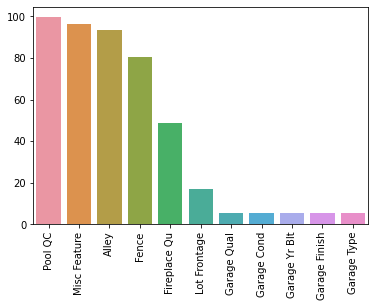

In [34]:
sns.barplot(x=percentage_missing.index, y=percentage_missing)
plt.xticks(rotation=90);

În graficul de mai sus avem coloanele din care lipsesc date pentru setul de date cu care lucrăm. Înainte ne-am ocupat de features unde lipsea mai puțin de 1% din totalul de date, dar acuma au mai rămas features de mai sus de care trebuie să ne ocupăm. Trebuie să decidem ce facem cu ele, ce putem face pentru un feature unde avem un procentaj de 99% de date lipsă (probabil să ștergem acel feature)

În lista de mai sus putem vedea că avem multe features care au denumirea de Garage, ceea ce seamănă cu ce am făcut anterior pentru Basement (Bsmt). Feature-urile care conțin date numerice le putem pune separat într-o coloană și să înlocuim valorile de NaN cu valorea 0, iar pentru cele categorice să setăm un string care are valoarea 'None'

In [35]:
garage_str_columns = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[garage_str_columns] = df[garage_str_columns].fillna('None')

In [36]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [41]:
percentage_missing = 100 * df.isnull().sum().sort_values(ascending=False) / len(df)
percentage_missing = percentage_missing[percentage_missing > 0]

In [42]:
percentage_missing

Pool QC         99.589744
Misc Feature    96.410256
Alley           93.230769
Fence           80.478632
Fireplace Qu    48.547009
Lot Frontage    16.752137
dtype: float64

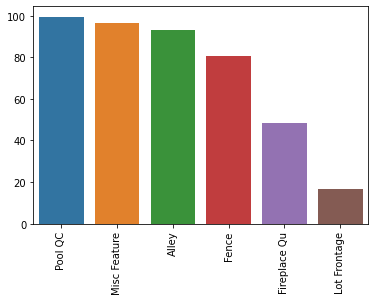

In [43]:
sns.barplot(x=percentage_missing.index, y=percentage_missing)
plt.xticks(rotation=90);

Am rezolvat și problema cu features ce țin de garajul unei case. Setarea valorii de 0 la feature-ul de Garage Yr Blt presupune faptul că nu avem un garaj, iar din moment ce lipsesc un număr de date relativ mic, iar acest feature de Garage presupune un feature cu o corelație mare pentru prețul vânzării nu o să ștergem acest feature, ci o să înlocuim valorile lipsă

Acum în graficul de mai sus sunt prezente feature care au procentaj mare de date lipsă. Primele patru features (Pool QC, Misc Feature, Alley, Fence) au un procentaj de peste 80% de date lipsă, prin urmare o să facem drop la aceste features (pentru anumite coloane s-ar putea verifica ce anume reprezintă datele din acele fatures). De exemplu, pentru coloana Pool QC, care face referire la piscina unei case, din moment ce nu are piscină, atunci se pune valoarea NaN. O piscină crește prețul unei case, de aceea ar exista și posibilitatea de a înlocui datele lipsă. Să ștergem coloanele respective (features)

In [44]:
df = df.drop(columns=['Pool QC', 'Misc Feature', 'Alley', 'Fence'])

In [45]:
percentage_missing = 100 * df.isnull().sum().sort_values(ascending=True) / len(df)
percentage_missing = percentage_missing[percentage_missing > 0]
percentage_missing

Lot Frontage    16.752137
Fireplace Qu    48.547009
dtype: float64

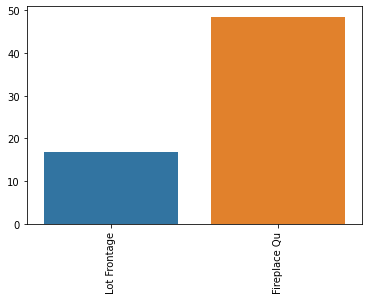

In [46]:
sns.barplot(x=percentage_missing.index, y=percentage_missing)
plt.xticks(rotation=90);

Am mai rămas doar cu două features acuma de care trebuie să ne ocupăm, însă acestea două sunt cele mai complicate deoarece nu lipsesc atât de multe date încât să zicem că am putea să ștergem acel feature, nici nu lipsesc puține date ca să ștergem rândurile respective. O să începem cu coloana de 'Fireplace Qu'. Să vedem întâi ce fel de date conține această coloană

In [47]:
df['Fireplace Qu']

PID
526301100     Gd
526350040    NaN
526351010    NaN
526353030     TA
527105010     TA
            ... 
923275080    NaN
923276100    NaN
923400125    NaN
924100070     TA
924151050     TA
Name: Fireplace Qu, Length: 2925, dtype: object

Putem vedea că sunt prezente date de tip string în cadrul acestui feature. Să vedem mai departe dacă aceste date sunt împărțite în categorii sau nu.

In [48]:
df['Fireplace Qu'].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

Există 5 categorii în cadrul acestui feature. Din moment ce este un feature care conține string-uri putem să înlocuim datele lipsă cu un string (valoarea 'None', ca de obicei)

In [49]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

In [50]:
df['Fireplace Qu'].value_counts()

None    1420
Gd       741
TA       600
Fa        75
Po        46
Ex        43
Name: Fireplace Qu, dtype: int64

Am rezolvat și problema cu coloana de 'Fireplace Qu', ne mai rămâne doar coloana de Lot Frontage. O să abordăm la fel această coloană, o să vedem inițial ce valori conține acest feature

In [51]:
df['Lot Frontage']

PID
526301100    141.0
526350040     80.0
526351010     81.0
526353030     93.0
527105010     74.0
             ...  
923275080     37.0
923276100      NaN
923400125     62.0
924100070     77.0
924151050     74.0
Name: Lot Frontage, Length: 2925, dtype: float64

Din moment ce acest feature conține valori numerice trebuie să vedem ce metodă statistică, pe baza a cărei coloane să apelăm această metodă statistică pentru a putea completa valorile lipsă. Pentru cazul de mai sus (deși poate nu este necesar) o să ne utilizăm de feature-ul 'Neighborhood'. O să zicem că acel Lot Fraontage va fi egal cu valoarea medie a fiecărei case dintr-un anumit cartier. Pentru a afla care este valoare medie a acestor case o să trebuiască să folosim groupby ca să grupăm toate valorile după acel feature

In [52]:
df.groupby('Neighborhood')

In [53]:
df.groupby('Neighborhood')['Lot Frontage']

In [54]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

Acuma am aflat valorie medie de la feature-url Lot Fraontage pentru fiecare cartier în parte. Urmează să înlocuim valorile lipsă din Lot Frontage cu mediile de mai sus. Acest lucru se poate face fie cu o buclă for prin care să parcurgem tot DataFrmae-ul în care să verificăm dacă avem valori lipsă, să vedem din ce cartier face partea acea casă care are valoare lipsă și să înlocuim valoarea cu media de mai sus (în funcție de cartierul în care se găsește casa respectivă). Metoda de mai sus necesită mult timp și cod, iar deoarece acest procedeu este des întâlnit, pandas ne oferă o metodă prin care putem face asta mai rapid. Metoda respectivă poartă denumirea de 'transform'

Metoda respectivă ne permită să combină procedeul de groupby cu un apply. Îi spunem să creeze o anumită funcție (sau creem o funcție pe care să o pasăm) iar funcția respectivă o să înlocuiască valorile cu valoarea medie dintr-un anumit grup. O să creem din nou acel obiect de groupby(), dar în loc să apelăm o metodă statistică de această dată o să utilizăm metoda transform

In [55]:
df.groupby('Neighborhood')['Lot Frontage'].transform()

TypeError: transform() missing 1 required positional argument: 'func'

Eroarea de mai sus ne spune că funcția transform ia ca și argument o funcție. Prin urmare trebuie să îi pasăm o funcție ca și prim argument. O să creem o funcție lambda care retunreasă aceeași valoare pentru început

In [56]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value)

PID
526301100    141.0
526350040     80.0
526351010     81.0
526353030     93.0
527105010     74.0
             ...  
923275080     37.0
923276100      NaN
923400125     62.0
924100070     77.0
924151050     74.0
Name: Lot Frontage, Length: 2925, dtype: float64

Metoda de mai sus doar returnează aceeași valoare care este oferită ca și argument. Dacă se oferă ca și argument valoarea NaN, tot valorea NaN o să fie returnată. O să modificăm metoda astfel încât să returneze doar pentru valorile care sunt lipsă, iar ceea ce o să returneze momentan este un string ('RETURN FROM TRANSFORM'). Acest string ar trebuie să apară în loc de NaN pentru idex-ul 923276100

In [57]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna('RETURN FROM TRANSFORM'))

PID
526301100                    141.0
526350040                     80.0
526351010                     81.0
526353030                     93.0
527105010                     74.0
                     ...          
923275080                     37.0
923276100    RETURN FROM TRANSFORM
923400125                     62.0
924100070                     77.0
924151050                     74.0
Name: Lot Frontage, Length: 2925, dtype: object

Putem acuma să vedem că valoare de NaN a fost înlocuită cu acel string. Acea valoare totuși dorim săo înlocuim cu valorea medie pentru fiecare carteier în parte. Din moment ce se utilizează groupby, ceea ce se pasează la funcția de transform este un obiect de groupby(). Acel 'value' reprezintă valorea pentru 'Lot Frontage' la fiecare grup în parte (fiecare cartier în parte). Pentru a afla valoarea medie trebuie doar să utilizăm 'value.mean()' (deoarece mean este acel obiect de groupby()). Putem să ne imaginăm că value.mean() reprezintă df.groupby('Neighborhood')['Lot Frontage'].mean() pentru fiecare carteier în parte

In [58]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

PID
526301100    141.000000
526350040     80.000000
526351010     81.000000
526353030     93.000000
527105010     74.000000
                ...    
923275080     37.000000
923276100     75.144444
923400125     62.000000
924100070     77.000000
924151050     74.000000
Name: Lot Frontage, Length: 2925, dtype: float64

În acest moment valorile lipsă au fost înlocuite cu valorile medii pentru fiecare cartier în parte. Ceea ce rezultă este un Series și putem să îl atribuim coloanei 'Lot Frontage' acuma

In [59]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

In [65]:
df.isnull().sum().sort_values(ascending=False)

Lot Frontage    3
MS SubClass     0
Half Bath       0
Fireplace Qu    0
Fireplaces      0
               ..
Exter Qual      0
Mas Vnr Area    0
Mas Vnr Type    0
Exterior 2nd    0
SalePrice       0
Length: 76, dtype: int64

Se pare totuși că au mai rămas încă trei valori la Lot Fromtage de NaN, acestea le putem înlocui cu valoarea 0

In [66]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [67]:
df.to_csv('../data/DATA/Ames_Housing_Data_finalized_missing_data.csv')

Din moment ce ne-am ocupat de toate valorile lipsă din cadrul acestui set de date, acuma putem să salvăm fișierul și să trecem mai departe

## Recapitulare

În cadrul acestei părți am învățat următoarele lucruri:

    1. Este recomandat să facem drop sau fill la procentajele mai mari de 1% din valorile lipsă. Dacă lipsește un procentaj mare de date dintr-un feature (80%-90%) atunci cel mai indicat este să ștergem acel feature

    2. Decizia de a șterge sau de a face fill la anumite date depinde de domain knowledge

    3. Cum să folosim metoda .transform()

        # metoda respectivă funcționează în mare măsură ca și un apply(), diferența crucială este însă faptul că această metodă funcționează pentru elemente de tipul groupby()

        df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean())